#### Exercise 1. Admission Prediction


##### Read data from file csv

In [1]:
# import module
import numpy as np
from pandas import *

In [2]:
# read CSV file
data = read_csv("Admission_Predict.csv")

# convert column data to list, then from list to array
sn = data['Serial No.'].tolist()

gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)

unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)

sop = data['SOP'].tolist()
X4 = np.asarray(sop)

lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1)

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)

research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)

prob_Admit = data['Chance of Admit'].tolist()
Yt = np.asarray(prob_Admit)

# print list data
print('Serial No', X1[:10])
print('GRE Score', X2[:10])
print('TOEFL Score', X3[:10])
print('Uni Rating', X4[:10])
print('SOP', X5[:10])
print('LOR', X6[:10])
print('Research', X7[:10])
print('Chance of Admit', Yt[:10])

Serial No [337 324 316 322 314 330 321 308 302 323]
GRE Score [118 107 104 110 103 115 109 101 102 108]
TOEFL Score [4 4 3 3 2 5 3 2 1 3]
Uni Rating [4.5 4.  3.  3.5 2.  4.5 3.  3.  2.  3.5]
SOP [4.5 4.5 3.5 2.5 3.  3.  4.  4.  1.5 3. ]
LOR [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.   8.6 ]
Research [1 1 1 1 0 1 1 0 0 0]
Chance of Admit [0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45]


##### (a) Classification using Logistic Regression

In [3]:
# (i) split training set and test set
# (ii) create data matrix X = (X1, X2, ..., X7)
X_train = np.concatenate(([X1[:350]], [X2[:350]], [X3[:350]], [X4[:350]], [X5[:350]], [X6[:350]], [X7[:350]]), axis = 0)
y_train = Yt[:350].reshape(350, 1)
print(X_train.shape)

X_test = np.concatenate(([X1[350:]], [X2[350:]], [X3[350:]], [X4[350:]], [X5[350:]], [X6[350:]], [X7[350:]]), axis = 0)
y_test = Yt[350:].reshape(1, 50)
y_test = np.array([[1 if yi >= 0.75 else 0 for yi in y_test[0]]])
print(X_test.shape)


(7, 350)
(7, 50)


In [4]:
# (iii) Make Xbar by adding column X0 = 1
X_train = np.concatenate((np.ones((1, 350)), X_train), axis = 0)
X_test = np.concatenate((np.ones((1, 50)), X_test), axis = 0)

print(X_train.shape)
print(X_train[:10])
print(X_test.shape)

(8, 350)
[[  1.     1.     1.   ...   1.     1.     1.  ]
 [337.   324.   316.   ... 299.   302.   313.  ]
 [118.   107.   104.   ...  94.    99.   101.  ]
 ...
 [  4.5    4.5    3.5  ...   1.     2.     3.  ]
 [  9.65   8.87   8.   ...   7.34   7.25   8.04]
 [  1.     1.     1.   ...   0.     0.     0.  ]]
(8, 50)


In [5]:
# (iv) define functions for estimating parameter
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
# method to calculate model logistic regression by Stochastic Gradient Descent method
# eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
# loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent)
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi)) # zi = h_theta(x) = g(theta^T * c)
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [6]:
# (v) print out results
eta = 0.05
d = X_train.shape[0]
w_init = np.random.randn(d, 1)

# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X_train, y_train, w_init, eta, tol = 1e-4, max_count= 10000)

# print out the parameter
print(w[-1])

C:\Users\Admin\AppData\Local\Temp\ipykernel_21684\1515702970.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-s))


[[ -3.6615756 ]
 [-19.29437896]
 [ 68.63267902]
 [ 38.50787934]
 [ 29.08385348]
 [ 25.41311038]
 [ 16.43248637]
 [ 16.6387367 ]]


In [7]:
# (vi) make prediction on test set
# calculate probability
zm = sigmoid(np.dot(w[-1].T, X_test))
zm

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])

In [8]:
y_predicted = np.array([[1 if yi >= 0.75 else 0 for yi in zm[0]]])
y_predicted

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

In [9]:
y_test

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 1]])

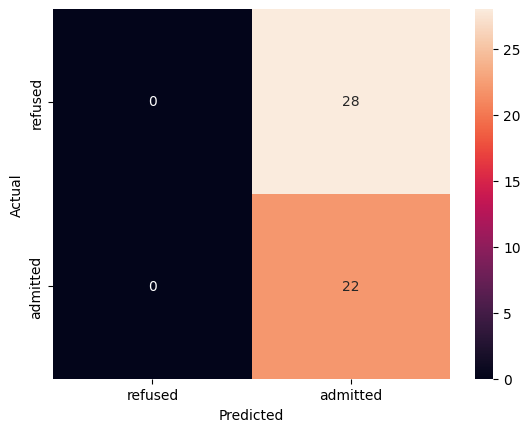

In [10]:
# (vii) compare and evaluate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# compute confusion matrix and visualize
cm = confusion_matrix(y_test[0], y_predicted[0])
labels = ['refused', 'admitted']
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
accuracy= accuracy_score(y_test[0], y_predicted[0])
precision = precision_score(y_test[0], y_predicted[0])
recall = recall_score(y_test[0], y_predicted[0])

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

Accuracy score: 0.44
Precision score: 0.44
Recall score: 1.0


##### (b) Prediction using Linear Regression

In [12]:
# remove column 'Research' that is discrete
X_train_linear = X_train[:-1]
print(X_train_linear.shape)

X_test_linear = X_test[:-1]

(7, 350)


In [13]:
def qr_householder(A):
    """ 
    Compute QR decomposition of A using Householder reflection
    """
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

In [14]:
def linear_regression(x_data, y_data):
    Q, R = qr_householder(x_data) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [15]:
# compute parameter
w = linear_regression(X_train_linear.T, y_train) # get result
w = w.T.tolist()
line = ['Intercept', 'GRE', "TOEFL", "Uni Rating", 'SOP', 'LOR', 'GPA']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: -1.3363841380610602
                 GRE: 0.002042971692334002
               TOEFL: 0.003136731483869007
          Uni Rating: 0.009931624451830682
                 SOP: -0.003469201515630637
                 LOR: 0.024906452650765725
                 GPA: 0.11276580996892152


In [16]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(X_train_linear.T, y_train)

LinearRegression(fit_intercept=False)

In [17]:
w = regr.coef_.tolist()
line = ['Intercept', 'GRE', "TOEFL", "Uni Rating", 'SOP', 'LOR', 'GPA']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: -1.336384138061061
                 GRE: 0.002042971692333983
               TOEFL: 0.0031367314838690167
          Uni Rating: 0.009931624451830583
                 SOP: -0.0034692015156306518
                 LOR: 0.02490645265076581
                 GPA: 0.11276580996892174


In [18]:
# make prediction on test set
w = regr.coef_
y_h = np.dot(w, X_test_linear)
y_h

array([[0.68804423, 0.7775118 , 0.60183009, 0.59766945, 0.52860151,
        0.65948723, 0.77980597, 0.58938628, 0.55699972, 0.657068  ,
        0.78124014, 0.89863736, 0.91427182, 0.64048032, 0.7439068 ,
        0.82828084, 0.71378544, 0.51634124, 0.50240143, 0.56917206,
        0.62266708, 0.80265195, 0.93187339, 0.71844015, 0.57435817,
        0.54046622, 0.4703578 , 0.47680105, 0.51795377, 0.63611023,
        0.76180106, 0.72892006, 0.82612722, 0.62818596, 0.95792864,
        0.97921359, 0.59338187, 0.63366547, 0.51664411, 0.72515572,
        0.62943684, 0.71877448, 0.82238502, 0.70946146, 0.84850007,
        0.79480733, 0.79706831, 0.9017538 , 0.73146866, 0.92224704]])

In [19]:
# calculate MSE
# using library built-in function
from sklearn.metrics import mean_squared_error

MSE_sk = mean_squared_error(y_test, y_h)
print(MSE_sk)

# using theorical formula
MSE = np.square(np.subtract(y_h, y_test)).mean()
print(MSE)

0.22619311918128748
0.22619311918128748


##### (c) Classification using Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

# convert probability into class 1 or 0
y_labels = np.array([1 if yi >= 0.75 else 0 for yi in y_train])

# fit model
clf = GaussianNB()
clf.fit(X_train.T, y_labels)

GaussianNB()

In [21]:
# make prediction on test set
y_pred = clf.predict(X_test.T)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1])

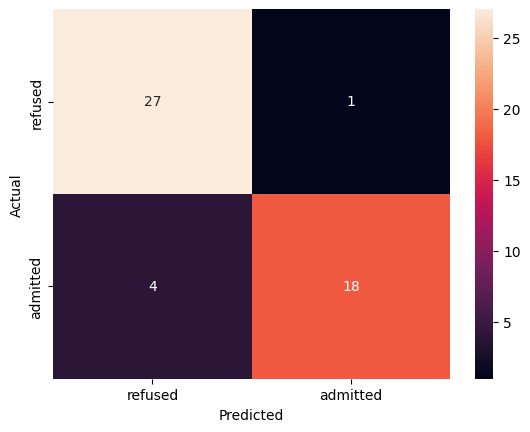

In [22]:
cm = confusion_matrix(y_test.T, y_pred)
labels = ['refused', 'admitted']
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
accuracy_nb = accuracy_score(y_test[0], y_pred)
precision_nb = precision_score(y_test[0], y_pred)
recall_nb = recall_score(y_test[0], y_pred)

print('Accuracy score:', accuracy_nb)
print('Precision score:', precision_nb)
print('Recall score:', recall_nb)

Accuracy score: 0.9
Precision score: 0.9473684210526315
Recall score: 0.8181818181818182


##### (d) Logistic Regression from scikit-learn package

In [24]:
from sklearn import linear_model

logReg = linear_model.LogisticRegression(penalty=None)
# train & compute weights w
logReg.fit(X_train.T, y_labels)
# for new data X_test, predict
logReg.predict(X_test.T)
# view w
print(logReg.coef_)

[[-0.90456948 -0.12076112  0.06171057  0.83783011  0.48111536  0.28514849
   3.09874237  1.99672951]]


c:\Users\Admin\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Exercise 2. Banking Sales Decline

read data from file

In [45]:
import pandas as pd

data=pd.read_csv("banking.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


convert data to proper form

In [46]:
# convert field of 'month'
dict_month = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 
              'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 
              'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
data['month'] = data['month'].map(dict_month)

# convert field of 'dayOfWeek'
dict_day = {'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 
            'thu': 5, 'fri': 6, 'sat': 7}
data['day_of_week'] = data['day_of_week'].map(dict_day)

# convert binary fields
#default
data.default.replace({'no': 0, 'yes': 1}, inplace = True)
#housing
data.housing.replace({'no': 0, 'yes': 1}, inplace = True)
#loan
data.loan.replace({'no': 0, 'yes': 1}, inplace = True)

# convert categories field by one host coding
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital', dtype=int)
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)

job_dummies = pd.get_dummies(data['job'], prefix = 'job', dtype=int)
job_dummies.drop('job_unknown', axis=1, inplace=True)
data= pd.concat([data, job_dummies], axis=1)

education_dummies = pd.get_dummies(data['education'], prefix = 'education', dtype=int)
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)

contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact', dtype=int)
#contact_dummies.drop('contact_unknown', axis=1, inplace=True)
data = pd.concat([data, contact_dummies], axis=1)

poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome', dtype=int)
#poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
data = pd.concat([data, poutcome_dummies], axis=1)

data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1, inplace=True)

In [78]:
# remove unknown value
data = data[data.default != 'unknown']
data = data[data.loan != 'unknown']
data = data[data.housing != 'unknown']
data.shape

(31828, 42)

split into training set and test set

In [48]:
# method 1 - train_test_split()
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2)

# method 2 - numpy.random.rand()
msk = np.random.rand(len(data)) < 0.8
train_data = data[msk]
test_data = data[~msk]

In [79]:
# method 3 - dataframe.sample()
train_data = data.sample(frac=0.8, random_state=17)
test_data = data.drop(train_data.index)

train_labels = train_data.y
train_data.drop('y', axis=1, inplace=True)
test_labels = test_data.y
test_data.drop('y', axis=1, inplace=True)

print(train_data.shape)
print(test_data.shape)

(25462, 41)
(6366, 41)


(a) classification using Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
import time 

logReg = LogisticRegression(penalty=None)
start = time.time()
logReg.fit(train_data, train_labels)
end = time.time()
lr_execution = end - start
logReg.coef_

c:\Users\Admin\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 4.30287225e-03, -2.56565032e-05,  5.43256119e-03,
        -6.14341084e-03, -3.80313524e-02, -2.35904760e-03,
         4.46784221e-03,  1.54663657e-02,  3.63720178e-03,
         1.38794840e-01, -1.88416724e-01,  4.13691290e-01,
         5.31006946e-02, -2.56465645e-01, -7.67535440e-03,
        -5.04258926e-02,  5.71394938e-02,  8.51985775e-04,
         3.94807053e-02, -7.35215194e-02, -9.21963348e-03,
         2.82039015e-03, -7.75469809e-04,  3.03065495e-02,
        -7.77081596e-03, -2.29705461e-02,  2.65111841e-02,
         6.55392541e-03,  1.05720000e-02, -7.77318135e-03,
        -8.97879146e-03, -4.42352589e-02, -2.39587624e-02,
         9.76418081e-04,  1.13316562e-02,  7.24441968e-02,
         7.61730114e-02, -7.25358096e-02, -1.09626688e-01,
        -5.18397596e-02,  1.65103649e-01]])

In [57]:
# make prediction on test set
y_pred = logReg.predict(test_data)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
cm = confusion_matrix(test_labels, y_pred)
cm

array([[5384,  155],
       [ 530,  297]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)
print('F1 score:', f1)

Accuracy score: 0.892397109644989
Precision score: 0.6570796460176991
Recall score: 0.3591293833131802
F1 score: 0.4644253322908522


(b) classification using Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

# fit model
clf = GaussianNB()
start = time.time()
clf.fit(train_data, train_labels)
end = time.time()
nb_execution = end - start

In [69]:
y_pred = clf.predict(test_data)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)
print('F1 score:', f1)

Accuracy score: 0.8224945020420986
Precision score: 0.374896779521057
Recall score: 0.5489721886336155
F1 score: 0.4455348380765456


(c) Compare two methods

In [71]:
print('Execution time:')
print('Logistic Regression: ' + str(lr_execution) + 'ms')
print('Naive Bayes: ' + str(nb_execution) + 'ms')

# Naive Bayes executed faster than Logistic Regression but lower accuracy 

Execution time:
Logistic Regression: 0.7183539867401123ms
Naive Bayes: 0.1269998550415039ms


#### Exercise 3. Framingham Chance of CHD

read data from file

In [88]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


remove null values

In [89]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [90]:
df = df.dropna(how='any', axis=0)
df.shape

(3656, 16)

split data into training and validation set

In [91]:
# ratio 7:3
train_data = df.sample(frac=0.7, random_state=17)
test_data = df.drop(train_data.index)

print(train_data.shape)
print(test_data.shape)

(2559, 16)
(1097, 16)


fit model and predict

In [92]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(penalty=None)
logReg.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
logReg.coef_

c:\Users\Admin\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.20585478,  0.03440667, -0.36939985, -0.07165654,  0.02306217,
         0.03277362,  0.02487312,  0.35947987,  0.07698633, -0.00153302,
         0.0204653 , -0.02844923, -0.05422202, -0.02663458,  0.00511778]])

In [93]:
y_pred = logReg.predict(test_data.iloc[:, :-1])
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_labels = test_data.iloc[:, -1]
acc = accuracy_score(y_labels, y_pred)
prec = precision_score(y_labels, y_pred)
rec = recall_score(y_labels, y_pred)

print('Accuracy score:', acc)
print('Precision score:', prec)
print('Recall score:', rec)

Accuracy score: 0.8550592525068368
Precision score: 0.5
Recall score: 0.050314465408805034
